In [3]:
import os, shutil

# the directory where you put the downloaded data
original_dataset_dir = r'C:/Users/acer/Desktop/QBS/tutorial week 6/train'
# the directory where you want to store your data
base_dir = r'C:/Users/acer/Desktop/QBS/tutorial week 6/FC'
# change your directory
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
# train_dir is 'C:/Users/acer/Desktop/QBS/tutorial week 6/FC\\train' here

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
# train_cats_dir is 'C:/Users/acer/Desktop/QBS/tutorial week 6/FC\\train\\cats' here
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# copy 1000 pictures to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [7]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), #lr -> learning rate
              metrics=['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

## Data should be formatted into appropriately preprocessed floating point tensors before being fed into the network.
## So, in next step, we need to rescale the picture file from pixels value (0-255) to the value between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## Here, we use generator to turn training data into batches of appropriate tensors
train_generator = train_datagen.flow_from_directory(
                    train_dir,              # the directory the program choose pictures
                    target_size=(150, 150), # resize image to 150*150
                    batch_size=20,          # don't set a big batch_size here, it will take you lots of time to train a model
                                            #  with a large batch_size
                    class_mode='binary')    # cat or dog -> binary data

validation_generator = test_datagen.flow_from_directory(
                         validation_dir,
                         target_size=(150, 150),
                         batch_size=20,
                         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
train_generator[1][0][0][149]

array([[0.5647059 , 0.57254905, 0.48627454],
       [0.70980394, 0.7176471 , 0.62352943],
       [0.5803922 , 0.57254905, 0.47450984],
       [0.44705886, 0.43137258, 0.3254902 ],
       [0.41176474, 0.39607847, 0.28235295],
       [0.5647059 , 0.5647059 , 0.454902  ],
       [0.2901961 , 0.227451  , 0.13725491],
       [0.2392157 , 0.20784315, 0.1254902 ],
       [0.41960788, 0.40000004, 0.32156864],
       [0.40784317, 0.35686275, 0.28235295],
       [0.42352945, 0.39607847, 0.29411766],
       [0.67058825, 0.6431373 , 0.5294118 ],
       [0.37254903, 0.34509805, 0.23137257],
       [0.6117647 , 0.5803922 , 0.49803925],
       [0.34901962, 0.3254902 , 0.19215688],
       [0.29411766, 0.26666668, 0.16470589],
       [0.10196079, 0.07450981, 0.04313726],
       [0.3921569 , 0.3921569 , 0.36078432],
       [0.5254902 , 0.54509807, 0.454902  ],
       [0.7254902 , 0.7176471 , 0.61960787],
       [0.43921572, 0.38431376, 0.28235295],
       [0.909804  , 0.8980393 , 0.8235295 ],
       [0.

model.fit_generator vs model.fit
(1) The batches of your inputs and targets are indefinite. You use the randomly generated batches from your training dataset as your input. So as validation part.
(2) steps_per_epoch: how many samples do you want to include in one batch, that is, how many times the model needs to evaluate the gradient before going to the next epoch.
(3) validation_steps: similar to the steps_per_epoch; it defines how many samples should be drawn from the validation dataset

In [10]:
history = model.fit_generator(
              train_generator,
              steps_per_epoch=100,
              epochs=30,
              validation_data=validation_generator,
              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 43s 428ms/step - loss: 0.6957 - acc: 0.5240 - val_loss: 0.6610 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 46s 465ms/step - loss: 0.6750 - acc: 0.5960 - val_loss: 0.6536 - val_acc: 0.6250
Epoch 3/30
100/100 [==============================] - 46s 457ms/step - loss: 0.6305 - acc: 0.6445 - val_loss: 0.6649 - val_acc: 0.5730
Epoch 4/30
100/100 [==============================] - 53s 535ms/step - loss: 0.5879 - acc: 0.6895 - val_loss: 0.6852 - val_acc: 0.6570
Epoch 5/30
100/100 [==============================] - 64s 643ms/step - loss: 0.5408 - acc: 0.7295 - val_loss: 0.5293 - val_acc: 0.6710
Epoch 6/30
100/100 [==============================] - 49s 494ms/step - loss: 0.5101 - acc: 0.7435 - val_loss: 0.5815 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 46s 461ms/step - loss: 0.4711 - acc: 0.7705 - val_loss: 0.5008 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 4

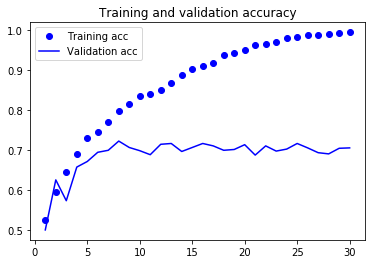

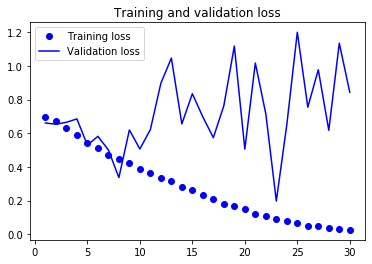

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 
plt.show()

In [12]:
datagen = ImageDataGenerator(
             rotation_range=40,
             width_shift_range=0.2,
             height_shift_range=0.2,
             shear_range=0.2,
             zoom_range=0.2,
             horizontal_flip=True,
             fill_mode='nearest')

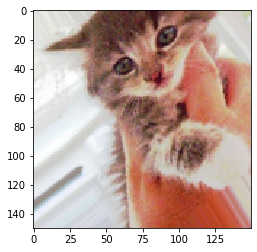

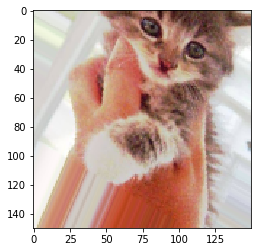

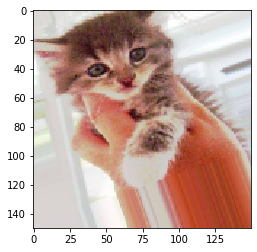

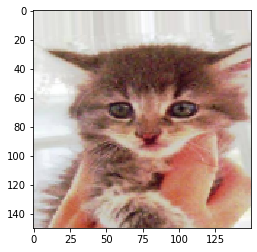

In [13]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] # fnames[3] is 'C:/Users/acer/Desktop/QBS/tutorial week 6/FC\\train\\cats\\cat.100.jpg'
                     # the cat picture with index 100
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)  #x is a 4-dimensional tensor

# show 4 transformed pictures
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
       break
    
plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [15]:
### You might need to install Pillow package here.

train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=40,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
                         validation_dir,
                         target_size=(150, 150),
                         batch_size=32,
                         class_mode='binary')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 78s 781ms/step - loss: 0.6902 - acc: 0.5271 - val_loss: 0.6561 - val_acc: 0.5787
Epoch 2/100
100/100 [==============================] - 77s 773ms/step - loss: 0.6776 - acc: 0.5638 - val_loss: 0.6976 - val_acc: 0.5193
Epoch 3/100
100/100 [==============================] - 76s 764ms/step - loss: 0.6705 - acc: 0.5748 - val_loss: 0.6410 - val_acc: 0.6187
Epoch 4/100
100/100 [==============================] - 77s 768ms/step - loss: 0.6597 - acc: 0.5994 - val_loss: 0.6078 - val_acc: 0.6405
Epoch 5/100
100/100 [==============================] - 77s 772ms/step - loss: 0.6475 - acc: 0.6247 - val_loss: 0.5849 - val_acc: 0.6637
Epoch 6/100
100/100 [==============================] - 77s 773ms/step - loss: 0.6381 - acc: 0.6304 - val_loss: 0.6082 - val_acc: 0.6353
Epoch 7/100
100/100 [==============================] - 77s 771ms/step - loss: 0.6250 - acc: 0.6517 -

100/100 [==============================] - 76s 763ms/step - loss: 0.4112 - acc: 0.8131 - val_loss: 0.2070 - val_acc: 0.8039
Epoch 61/100
100/100 [==============================] - 76s 757ms/step - loss: 0.4045 - acc: 0.8141 - val_loss: 0.3652 - val_acc: 0.7887
Epoch 62/100
100/100 [==============================] - 77s 769ms/step - loss: 0.3888 - acc: 0.8226 - val_loss: 0.6322 - val_acc: 0.7982
Epoch 63/100
100/100 [==============================] - 76s 759ms/step - loss: 0.4018 - acc: 0.8147 - val_loss: 0.5122 - val_acc: 0.7661
Epoch 64/100
100/100 [==============================] - 76s 756ms/step - loss: 0.3937 - acc: 0.8235 - val_loss: 0.2254 - val_acc: 0.8028
Epoch 65/100
100/100 [==============================] - 76s 763ms/step - loss: 0.3939 - acc: 0.8213 - val_loss: 0.4403 - val_acc: 0.8020
Epoch 66/100
100/100 [==============================] - 76s 760ms/step - loss: 0.4057 - acc: 0.8182 - val_loss: 0.4912 - val_acc: 0.7996
Epoch 67/100
100/100 [==============================] 

In [17]:
model.save('cats_and_dogs_small_2.h5')

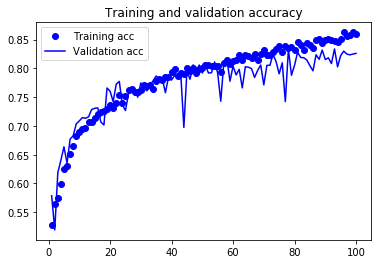

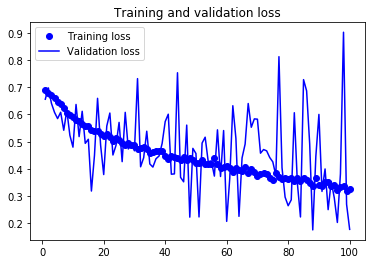

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 
plt.show()